## ARBOLES DE DECISION

### Juan Jose Bocanegra Vergara

In [4]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
# Cargamos el dataset y mostramos las 5 primeras lineas
df = pd.read_csv("VINOS.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Ver la medida del array cargado 
df.shape

(1599, 12)

In [10]:
# Ver descripción general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# Ver resumen estadistico
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
# Verificar valores nulos
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

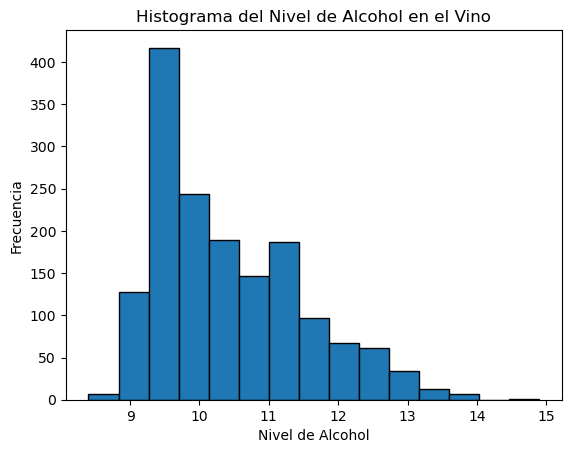

In [32]:
# Histograma de la característica 'alcohol'
plt.hist(df['alcohol'], bins=15, edgecolor='black')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Histograma del Nivel de Alcohol en el Vino')
plt.show()

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
# Seleccionar características y objetivo
X = df.drop('quality', axis=1)
y = df['quality']

In [50]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# Predecir y evaluar el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Definir el modelo
dtc = DecisionTreeClassifier(random_state=42)

# Definir el rango de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [60]:
# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Mejores parámetros: {best_params}')
print(f'Mejor precisión durante la validación: {best_score:.2f}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor precisión durante la validación: 0.61


In [64]:
# Entrenar el modelo con los mejores parámetros
best_dtc = DecisionTreeClassifier(**best_params, random_state=42)
best_dtc.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = best_dtc.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo optimizado: {accuracy:.2f}')

# Reporte de clasificación
print("\nReporte de Clasificación:")



Accuracy del modelo optimizado: 0.58

Reporte de Clasificación:


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [68]:
# Predecir etiquetas en el conjunto de prueba
y_pred = best_dtc.predict(X_test)  # Usar el modelo optimizado

In [70]:
# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.58
Precision: 0.56
Recall: 0.58
F1 Score: 0.57


C:\Users\juanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


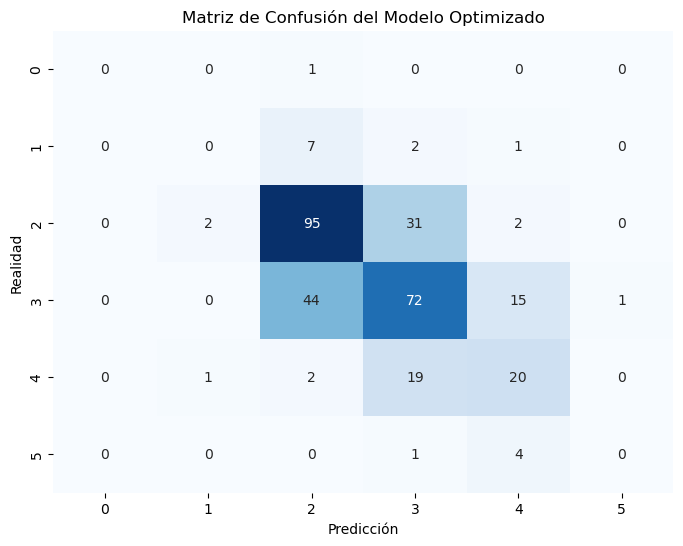

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión del Modelo Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# GRAFICA DE DISPERSION

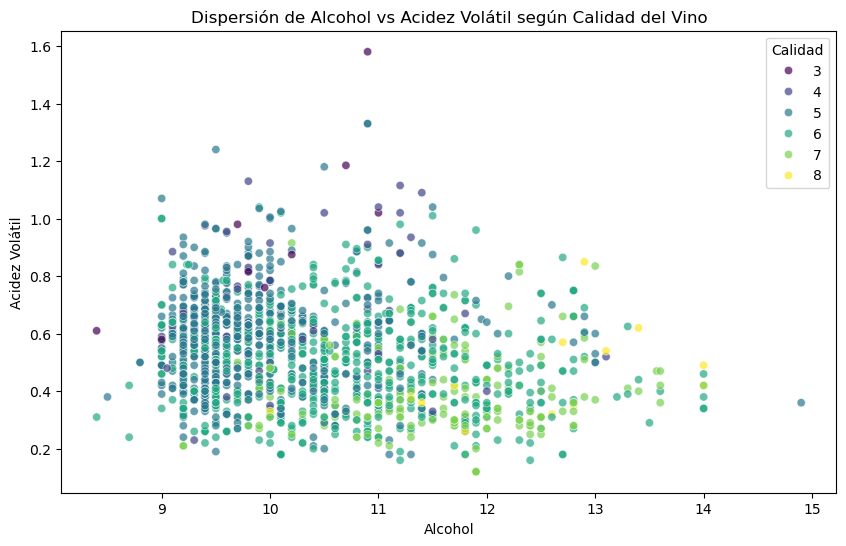

In [87]:
# Gráfico de dispersión entre dos características
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['alcohol'], y=df['volatile acidity'], hue=df['quality'], palette='viridis', alpha=0.7)
plt.title('Dispersión de Alcohol vs Acidez Volátil según Calidad del Vino')
plt.xlabel('Alcohol')
plt.ylabel('Acidez Volátil')
plt.legend(title='Calidad')
plt.show()